In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd

iris = pd.read_csv("iris.csv")
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [2]:
np.random.seed(0)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris.drop(["Species"], axis=1), iris["Species"], test_size=0.3)

In [4]:
from sklearn.tree import DecisionTreeClassifier

DTree = DecisionTreeClassifier(criterion='entropy', 
                               max_depth=5,
                               min_samples_split=20,
                               min_samples_leaf=5)

DTree.fit(X_train, y_train)

print("Genauigkeit der Testdaten: {:.4f}".format(DTree.score(X_test, y_test)))

Genauigkeit der Testdaten: 0.9111


Normalized confusion matrix


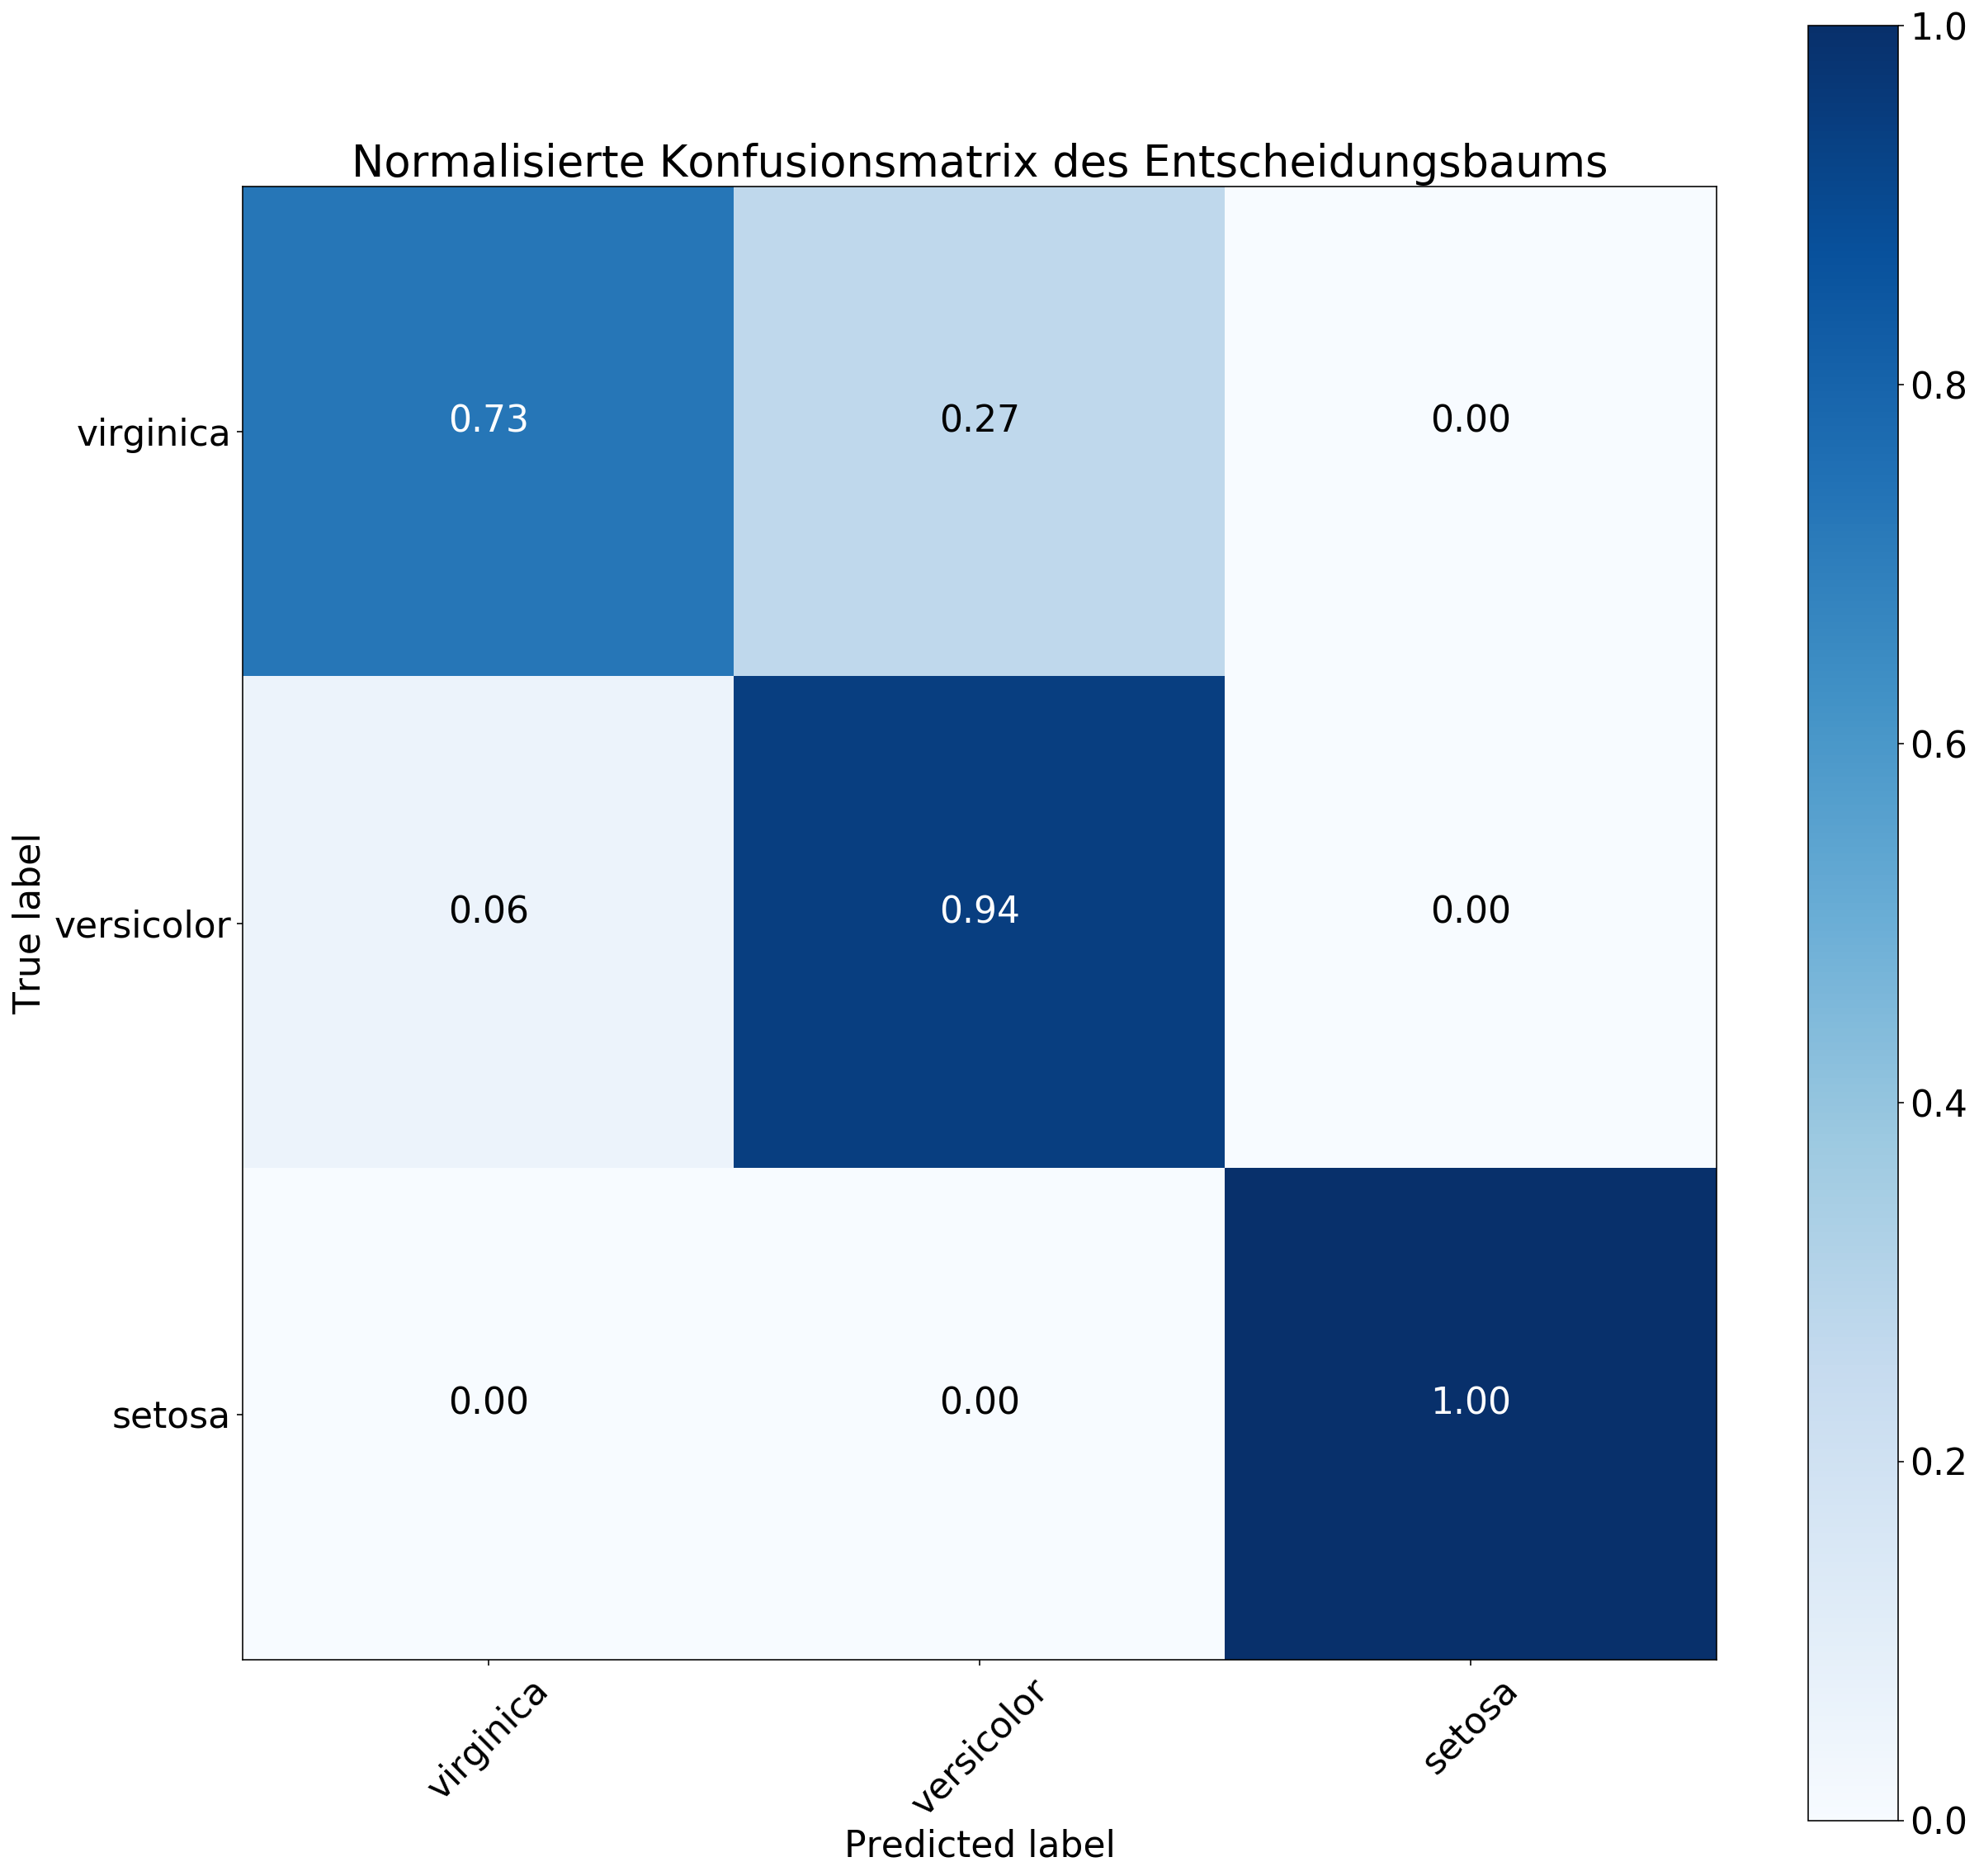

In [5]:
%run confusion_matrix_style.py

y_pred = DTree.predict(X_test)
cnf_matrix = confusion_matrix(y_test, y_pred, labels=y_test.unique())
plot_confusion_matrix(cnf_matrix, classes=y_test.unique(), normalize=True, title='Normalisierte Konfusionsmatrix des Entscheidungsbaums')

plt.show()

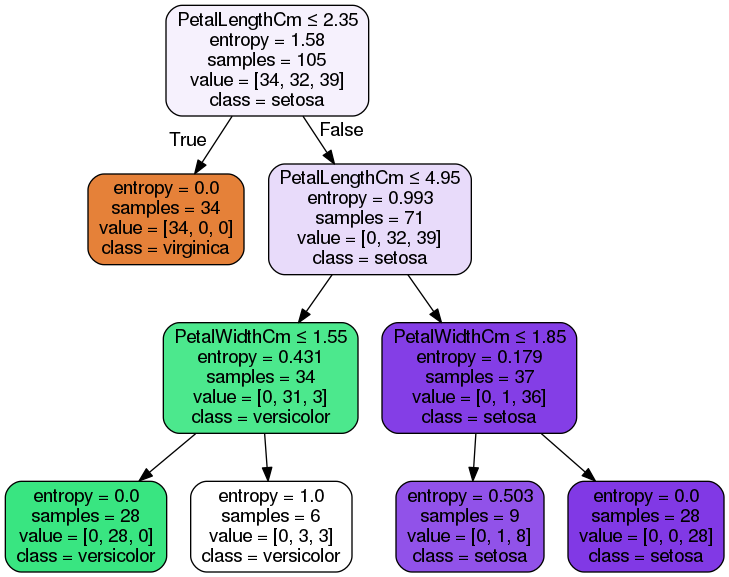

In [22]:
# visualize tree structure
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image  

iris.feature_names=["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]
iris.target_names=["virginica","versicolor","setosa"]

dot_data = export_graphviz(DTree, out_file=None, feature_names=iris.feature_names,  class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())